<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/Diferencias_progresivas(Parte_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use los tamaños de paso
a) h = 0.1 y k = 0.0005  
b) h = 0.1 y k = 0.01  
para aproximar la solución de la ecuación de calor

$∂u/∂t (x, t) - ∂²u/∂x² (x, t) = 0,     0 < x < 1,     0 ≤ t$,

con condiciones de frontera

$u(0, t) = u(1, t) = 0,     0 < t$

y condiciones iniciales

$u(x, 0) = sen(πx),     0 ≤ x ≤ 1$.

Compare los resultados en t = 0.5 con la solución exacta

$u(x, t) = e^{−π²t}  sen(πx)$


Librerias que usaremos en A)



In [29]:
import numpy as np
import matplotlib.pyplot as plt


Parametros a tomar en cuenta

In [30]:
L = 1.0         # longitud del dominio
Tmax = 0.5     # tiempo máximo
h = 0.1         # paso espacial
k = 0.0005      # paso temporal


In [31]:
#Discretizacion
x = np.arange(0, L + h, h)
t = np.arange(0, Tmax + k, k)
Nx = len(x)
Nt = len(t)

r = k / h**2
print(f"r = {r:.3f}")


r = 0.050


Tomamos las condiciones iniciales y de frontera

In [32]:
u = np.zeros((Nt, Nx))
u[0, :] = np.sin(np.pi * x)  # condición inicial



Usando el metodo de forma explicita

In [33]:
for j in range(0, Nt - 1):
    for i in range(1, Nx - 1):
        u[j + 1, i] = (1 - 2 * r) * u[j, i] + r * (u[j, i + 1] + u[j, i - 1])
    u[j + 1, 0] = 0
    u[j + 1, -1] = 0

Obtengamos la solucion exacta para comparar

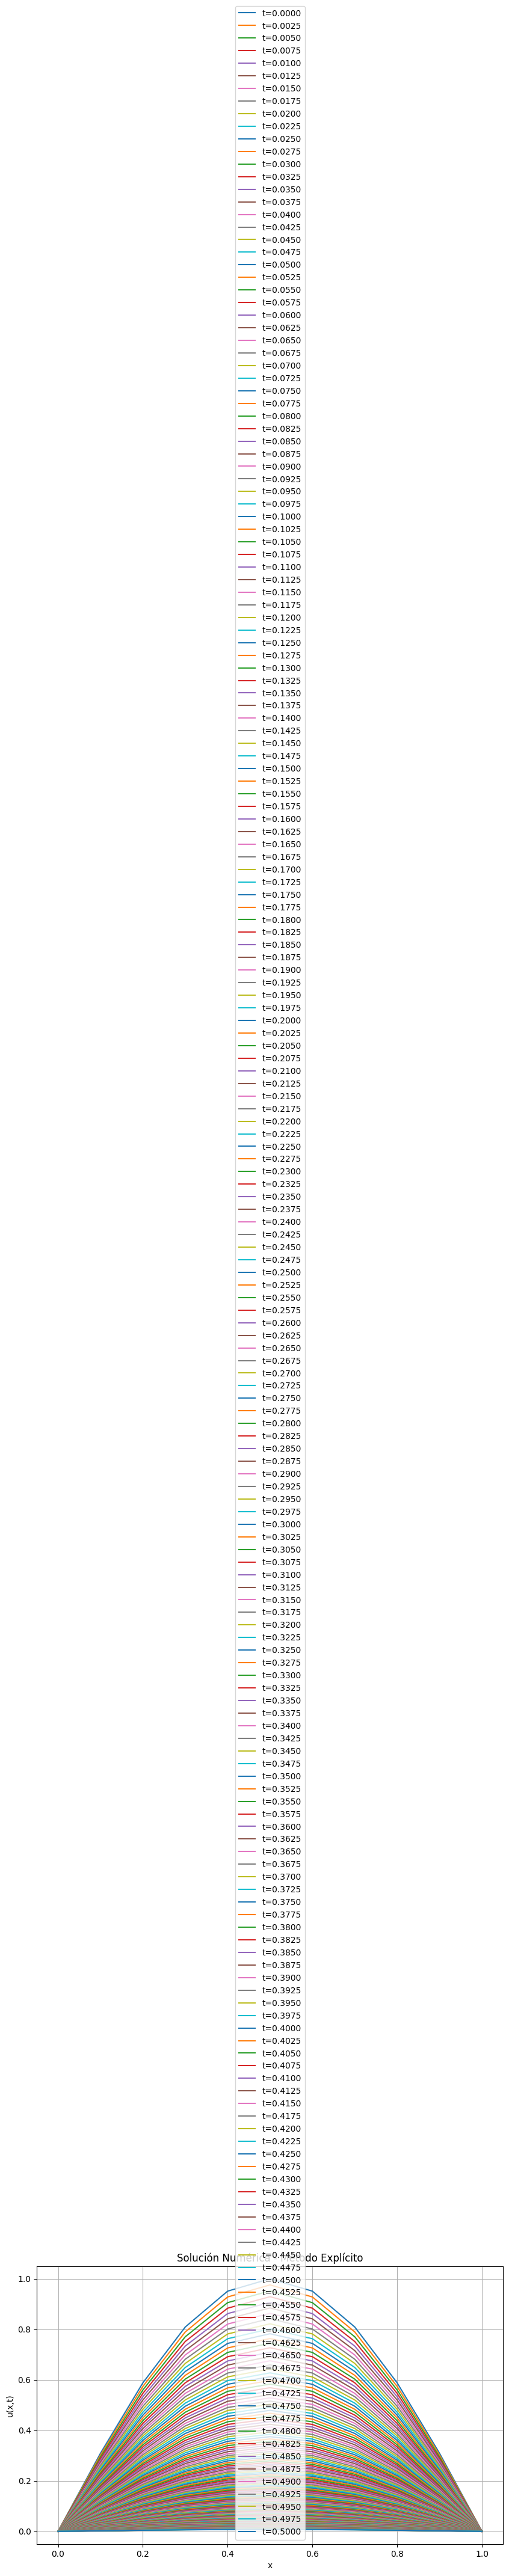

In [34]:
u_exact = np.zeros((Nt, Nx))
for j in range(Nt):
    u_exact[j, :] = np.exp(-np.pi**2 * t[j]) * np.sin(np.pi * x)

# Gráficas
plt.figure(figsize=(10, 6))
for j in range(0, Nt, 5):
    plt.plot(x, u[j, :], label=f"t={t[j]:.4f}")
plt.title("Solución Numérica - Método Explícito")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)
plt.show()


De lo anterior, hagamos la comparacion final numerica vs exacta

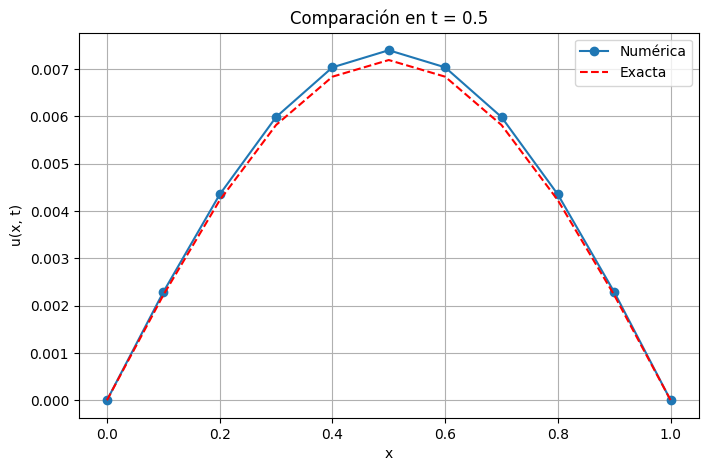

,x=0.0,x=0.1,x=0.2,x=0.3,x=0.4,x=0.5,x=0.6,x=0.7,x=0.8,x=0.9,x=1.0
t=0.0000,0.0,0.309017,0.587785,0.809017,0.951057,1.000000,0.951057,0.809017,0.587785,0.309017,1.224647e-16
t=0.0005,0.0,0.307505,0.584908,0.805057,0.946402,0.995106,0.946402,0.805057,0.584908,0.307505,0.000000e+00
t=0.0010,0.0,0.306000,0.582046,0.801117,0.941770,0.990235,0.941770,0.801117,0.582046,0.306000,0.000000e+00
t=0.0015,0.0,0.304502,0.579197,0.797196,0.937160,0.985389,0.937160,0.797196,0.579197,0.304502,0.000000e+00
t=0.0020,0.0,0.303012,0.576362,0.793294,0.932574,0.980566,0.932574,0.793294,0.576362,0.303012,0.000000e+00
t=0.0025,0.0,0.301528,0.573541,0.789412,0.928009,0.975767,0.928009,0.789412,0.573541,0.301528,0.000000e+00


In [35]:
plt.figure(figsize=(8, 5))
plt.plot(x, u[-1, :], 'o-', label='Numérica')
plt.plot(x, u_exact[-1, :], 'r--', label='Exacta')
plt.title(f"Comparación en t = {Tmax}")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar tabla de los primeros pasos
import pandas as pd
tabla = pd.DataFrame(u[:6, :], columns=[f"x={xi:.1f}" for xi in x])
tabla.index = [f"t={tj:.4f}" for tj in t[:6]]
tabla

COMENTARIO:
Al aumentar el tamaño del paso temporal k sin cambiar el paso espacial h, el cociente $r = \frac{k}{h^2}$ aumenta.
Por otro lado cuando r $\leq 0.5$, el método explícito es estable y la solución numérica aproxima correctamente la disipación del calor.